# Loading Libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import os
import cv2

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

main_accent_colour = "#b366ff"
dim_colour="darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]

# Analyzing

In [63]:
import os
train_dir = '/Users/vishnu/Downloads/FER_2013/train'
test_dir = '/Users/vishnu/Downloads/FER_2013/test'

row = 48
col = 48
import os
img_size = 48 #original size of the image


classes = len(os.listdir(train_dir))

In [64]:
print("Train Set :")

train_count = []
for folder in os.listdir(train_dir) :
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):  # Check if it's a directory
        print(folder, "folder contains\t\t", len(os.listdir(folder_path)), "images")
        train_count.append(len(os.listdir(folder_path)))
    
print()

test_count = []
print("Test Set :")
for folder in os.listdir(test_dir) :
    folder_path = os.path.join(test_dir, folder)
    if os.path.isdir(folder_path):  # Check if it's a directory
        print(folder, "folder contains\t\t", len(os.listdir(folder_path)), "images")
        train_count.append(len(os.listdir(folder_path)))

Train Set :
happy folder contains		 7215 images
sad folder contains		 4830 images
fear folder contains		 4097 images
surprise folder contains		 3171 images
neutral folder contains		 4965 images
angry folder contains		 3995 images
disgust folder contains		 436 images

Test Set :
happy folder contains		 1774 images
sad folder contains		 1247 images
fear folder contains		 1024 images
surprise folder contains		 831 images
neutral folder contains		 1233 images
angry folder contains		 958 images
disgust folder contains		 111 images


# Preprocessing

In [65]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [66]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


# Model

In [102]:
from tensorflow.keras.layers import MaxPooling2D
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [73]:
epochs = 60
batch_size = 64
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,496,903 (17.15 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [70]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

NameError: name 'model_2' is not defined

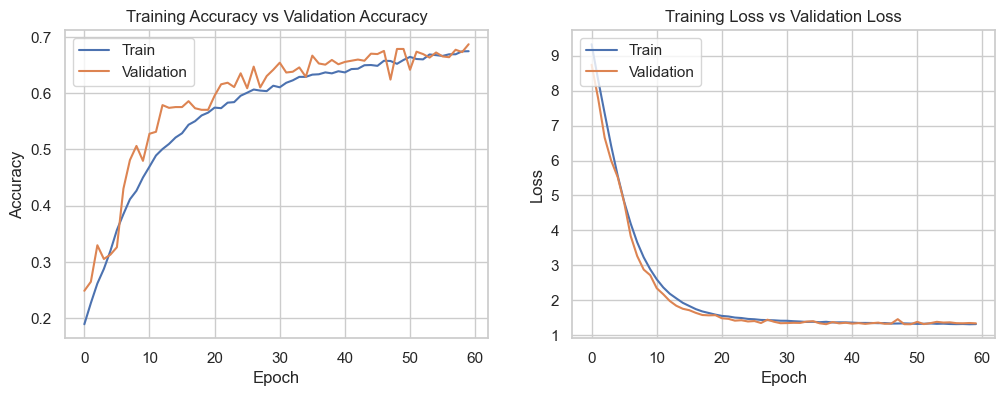

In [105]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model_optimal.h5')

: 

# Custom Testing

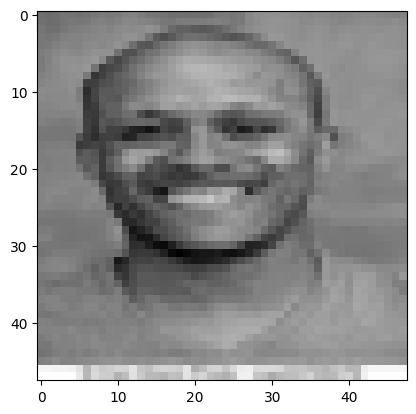

In [38]:
from PIL import Image, ExifTags
import numpy as np
import matplotlib.pyplot as plt

# Load the image using PIL
img_path = "/Users/vishnu/Downloads/Human Action Recognition/test/Image_4975.jpg"
img = Image.open(img_path)

# Correct the orientation using EXIF data
try:
    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    exif = dict(img._getexif().items())

    if exif[orientation] == 3:
        img = img.rotate(180, expand=True)
    elif exif[orientation] == 6:
        img = img.rotate(270, expand=True)
    elif exif[orientation] == 8:
        img = img.rotate(90, expand=True)
except (AttributeError, KeyError, IndexError):
    # cases: image doesn't have getexif
    pass

# Convert the image to grayscale and resize it
img = img.convert('L')
img = img.resize((48,48))

# Display the processed image
plt.imshow(img, cmap='gray')
plt.show()

# Convert the image to a numpy array and normalize it
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 48, 48, 1)  # Add batch dimension

# Now img_array is ready for model prediction


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img

# Ensure these libraries are loaded without error
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import load_img

# Ensure these libraries are loaded without error

from tensorflow.keras import regularizers

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(512, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(7, activation='softmax')
])


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
from tensorflow.keras.models import load_model

# Assuming the model was saved with `model.save('model_optimal.h5')`
#model = load_model('/Users/vishnu/Desktop/viji files/sem 6/IR/Project/model_optimal.h5')
weights_path = '/Users/vishnu/Desktop/viji files/sem 6/IR/Project/model_weights.weights.h5'  
model.load_weights(weights_path)



In [39]:
result = model.predict(img_array)
predicted_class_index = np.argmax(result, axis=1)

# Assuming the same label dictionary as before
label_dict = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}
predicted_label = label_dict[predicted_class_index[0]]

print(f"Predicted Emotion: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Emotion: Happy


In [133]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 155s 430ms/step - accuracy: 0.7272 - loss: 1.1719
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - accuracy: 0.6908 - loss: 1.3138
final train accuracy = 72.92 , validation accuracy = 68.72


In [132]:
#F1-score, Precision, Recall
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming 'model' is your trained model and 'test_data' is your test dataset
model = load_model('/Users/vishnu/Desktop/viji files/sem 6/IR/Project/model_optimal.h5')

# Load your test data - ensure it is preprocessed similarly to your training data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/Users/vishnu/Downloads/FER_2013/test',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: keep data in same order as labels
)

# Predict the whole generator
preds = model.predict(test_generator)
pred_labels = np.argmax(preds, axis=1)

# True labels (you need to ensure that the generator has the `shuffle=False`)
true_labels = test_generator.classes

# Calculate precision, recall, F1-score
report = classification_report(true_labels, pred_labels, target_names=test_generator.class_indices.keys())
print(report)


Found 7178 images belonging to 7 classes.
225/225 ━━━━━━━━━━━━━━━━━━━━ 60s 265ms/step
              precision    recall  f1-score   support

       angry       0.58      0.60      0.59       958
     disgust       0.67      0.46      0.55       111
        fear       0.59      0.34      0.43      1024
       happy       0.88      0.85      0.87      1774
     neutral       0.53      0.75      0.62      1233
         sad       0.54      0.54      0.54      1247
    surprise       0.77      0.76      0.76       831

    accuracy                           0.66      7178
   macro avg       0.65      0.61      0.62      7178
weighted avg       0.66      0.66      0.65      7178



In [ ]:
model.save_weights('model_weights.weights.h5')